In [ ]:
!pip install opencv-python
!pip install matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


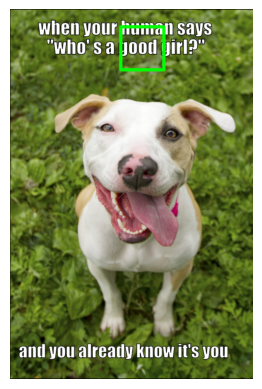

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Specify the path to your image
from google.colab import drive
drive.mount('/content/drive')
image_path = "/content/drive/MyDrive/Precog/Colab Notebooks/dataset/01243.png"
# Update the path to the XML file to include the full path
xml_path = "/content/drive/MyDrive/Precog/Colab Notebooks/stop_data.xml"

# Open the image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

# Convert the image to grayscale and RGB
try:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except cv2.error as e:
    print(f"Error converting image color: {e}")
    raise

# Load the stop sign data
stop_data = cv2.CascadeClassifier(xml_path)

# Check if the stop sign data was loaded successfully
if stop_data.empty():
    raise FileNotFoundError("stop_data.xml not found or not loaded properly. Check the path.") # More informative error message

# Detect stop signs in the image
found = stop_data.detectMultiScale(img_gray, minSize=(20, 20))

# Draw rectangles around detected stop signs
for (x, y, width, height) in found:
    cv2.rectangle(img_rgb, (x, y), (x + width, y + height), (0, 255, 0), 5)

# Display the result
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


